### OTT- Movie Recommendation System

Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

**Dataset**: https://drive.google.com/drive/folders/1RY4RG7rVfY8-0uGeOPWqWzNIuf-iosuv

**Data Dictionary**:

#### 1. Ratings File Description

All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

UserIDs range between 1 and 6040

MovieIDs range between 1 and 3952

Ratings are made on a 5-star scale (whole-star ratings only)

Timestamp is represented in seconds

Each user has at least 20 ratings

#### 2. User File Description

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

Gender is denoted by a "M" for male and "F" for female

Age is chosen from the following ranges:

1: "Under 18"

18: "18-24"

25: "25-34"

35: "35-44"

45: "45-49"

50: "50-55"

56: "56+"

Occupation is chosen from the following choices:

0: "other" or not specified

1: "academic/educator"

2: "artist"

3: "clerical/admin"

4: "college/grad student"

5: "customer service"

6: "doctor/health care"

7: "executive/managerial"

8: "farmer"

9: "homemaker"

10: "K-12 student"

11: "lawyer"

12: "programmer"

13: "retired"

14: "sales/marketing"

15: "scientist"

16: "self-employed"

17: "technician/engineer"

18: "tradesman/craftsman"

19: "unemployed"

20: "writer"

#### 3. Movie File Description

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

Titles are identical to titles provided by the IMDB (including year of release)

Genres are pipe-separated and are selected from the following genres:

Action

Adventure

Animation

Children's

Comedy

Crime

Documentary

Drama

Fantasy

Film-Noir

Horror

Musical

Mystery

Romance

Sci-Fi

Thriller

War

Western

###### Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

###### Importing the dataset's.

In [2]:
!gdown 15QeQgmjoeBxRDEOFPSrMr8eIvwk6QgUQ

Downloading...
From: https://drive.google.com/uc?id=15QeQgmjoeBxRDEOFPSrMr8eIvwk6QgUQ
To: D:\ScalerFinalBCKUP\Recommendation_systems\zee-movies.dat

  0%|          | 0.00/171k [00:00<?, ?B/s]
100%|##########| 171k/171k [00:00<?, ?B/s]


In [3]:
!gdown 1XJpSzv-UMeSmCCOdyZviRF4XCxiKJUrk

Downloading...
From: https://drive.google.com/uc?id=1XJpSzv-UMeSmCCOdyZviRF4XCxiKJUrk
To: D:\ScalerFinalBCKUP\Recommendation_systems\zee-ratings.dat

  0%|          | 0.00/24.6M [00:00<?, ?B/s]
  2%|2         | 524k/24.6M [00:00<00:05, 4.10MB/s]
  9%|8         | 2.10M/24.6M [00:00<00:02, 9.53MB/s]
 13%|#2        | 3.15M/24.6M [00:00<00:02, 8.10MB/s]
 21%|##1       | 5.24M/24.6M [00:00<00:01, 11.1MB/s]
 28%|##7       | 6.82M/24.6M [00:00<00:01, 12.4MB/s]
 34%|###4      | 8.39M/24.6M [00:00<00:01, 13.2MB/s]
 41%|####      | 9.96M/24.6M [00:00<00:01, 13.7MB/s]
 47%|####6     | 11.5M/24.6M [00:00<00:00, 14.2MB/s]
 53%|#####3    | 13.1M/24.6M [00:01<00:00, 14.4MB/s]
 60%|#####9    | 14.7M/24.6M [00:01<00:00, 14.8MB/s]
 66%|######6   | 16.3M/24.6M [00:01<00:00, 14.8MB/s]
 72%|#######2  | 17.8M/24.6M [00:01<00:00, 14.9MB/s]
 79%|#######8  | 19.4M/24.6M [00:01<00:00, 15.0MB/s]
 85%|########5 | 21.0M/24.6M [00:01<00:00, 15.0MB/s]
 94%|#########3| 23.1M/24.6M [00:01<00:00, 15.4MB/s]
100%|#######

In [4]:
!gdown 1-xsSNizet0ruiMgKLWRcmme8L_iDejhc

Downloading...
From: https://drive.google.com/uc?id=1-xsSNizet0ruiMgKLWRcmme8L_iDejhc
To: D:\ScalerFinalBCKUP\Recommendation_systems\zee-users.dat

  0%|          | 0.00/134k [00:00<?, ?B/s]
100%|##########| 134k/134k [00:00<00:00, 3.57MB/s]


##### Reading the dataset

In [5]:
movies=pd.read_fwf('zee-movies.dat', encoding='ISO-8859-1')
users=pd.read_fwf('zee-users.dat', encoding='ISO-8859-1')
ratings=pd.read_fwf('zee-ratings.dat', encoding='ISO-8859-1')

In [6]:
movies.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


Movies dataframe have the details like Movie ID, Title and Genre to which the movies belong.

In [7]:
users.head()

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


Users dataframe have the demographic details of the user and their occupation.

In [8]:
ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


The Ratings dataset has the details of the user, the movies that they have watched and the ratings that the user has given to the movie.

##### Initial preprocessing of the dataset.

We see that the data is not formatted properly to be used to build the recommendation systems. So lets proceed further with data cleansing and formatting.

In [9]:
movies.drop(['Unnamed: 1','Unnamed: 2'],axis=1,inplace=True)
movies.head()

,Movie ID::Title::Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy


In [10]:
cols=movies.columns.values[-1].split('::')
movies=movies.iloc[:,0].str.split('::',expand=True)
movies.columns=cols
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
user_cols=users.columns.values[-1].split('::')
users=users.iloc[:,0].str.split('::',expand=True)
users.columns=user_cols
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
rating_cols=ratings.columns.values[-1].split('::')
ratings=ratings.iloc[:,0].str.split('::',expand=True)
ratings.columns=rating_cols
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Data is somewhat formatted now, we have to do more processing on it so that we can build recommendation systems out of it.

###### Movies

We can see that a single movie have several genres tagged to it. So we have to split and explode the column

In [13]:
movies['Genres']=movies.Genres.str.split('|')
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [14]:
movies=movies.explode(column='Genres')
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's


Now let's pivot the table in such a way that all the genres will be converted as different columns.

Now before proceeding further, we will see the unique genres that are present in the dataset and compare it with the list of Genres that were provided by the OTT platform.

In [15]:
movies.Genres.unique()

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', None,
       'Film-Noir', 'Dram', 'Western', 'Chil', '', 'Fantas', 'Dr', 'D',
       'Documenta', 'Wester', 'Fant', 'Music', 'Childre', 'Childr', 'Rom',
       'Animati', 'Children', 'Come', "Children'", 'Sci-F', 'Adv',
       'Adventu', 'Horro', 'Docu', 'S', 'Sci-', 'Document', 'Th', 'Roman',
       'Documen', 'We', 'F', 'Ro', 'R', 'Sci', 'Chi', 'Thri', 'Adventur',
       'Advent', 'Acti', 'Roma', 'A', 'Comed', 'Com', 'Thrille', 'Wa',
       'Horr'], dtype=object)

The original Genres that were provided by the product owners of the OTT platform

Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

Thus we might have to clean the Genres feature such that we only have the desired set of Genres in the column

In [16]:
def mapGenres(value):
    if value in(['Fantas','Fant','F']):
        return 'Fantasy'
    elif value in [None,'']:
        return 'Other'
    elif value in ['Dram','Dr','D']:
        return 'Drama'
    elif value in ['Documenta','Docu','Document','Documen']:
        return 'Documentary'
    elif value in ['Chil','Childre','Childr','Children','Children\'','Chi']:
        return 'Children\'s'
    elif value in ['Wester','We']:
        return 'Western'
    elif value in ['Rom','Roman','Ro','R','Roma']:
        return 'Romance'
    elif value in ['Animati','A']:
        return 'Animation'
    elif value in ['Adventu','Adv','Adventur','Advent']:
        return 'Adventure'
    elif value in ['Acti']:
        return 'Action'
    elif value in ['Comed','Com','Come']:
        return 'Comedy'
    elif value in ['Wa']:
        return 'War'
    elif value in ['Thrille','Thri','Th']:
        return 'Thriller'
    elif value in ['Horro','Horr']:
        return 'Horror'
    elif value in ['Sci','Sci-','S','Sci-F']:
        return 'Sci-Fi'
    elif value in ['Music','Musical']:
        return 'Musical'
            
    return value

Calling the MapGenres function on top Genres column to get the desired genres.

In [17]:
movies.Genres=movies.Genres.apply(mapGenres)
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's


###### Checking the types of the feature's in the dataset

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6366 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  6366 non-null   object
 1   Title     6366 non-null   object
 2   Genres    6366 non-null   object
dtypes: object(3)
memory usage: 198.9+ KB


Lets convert Movie ID column type to integer so that it can be set as index while pivotting the table.

In [19]:
movies['Movie ID']=movies['Movie ID'].astype(int)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6366 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  6366 non-null   int32 
 1   Title     6366 non-null   object
 2   Genres    6366 non-null   object
dtypes: int32(1), object(2)
memory usage: 174.1+ KB


In [20]:
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's


Checking the Distribution of Genres feature

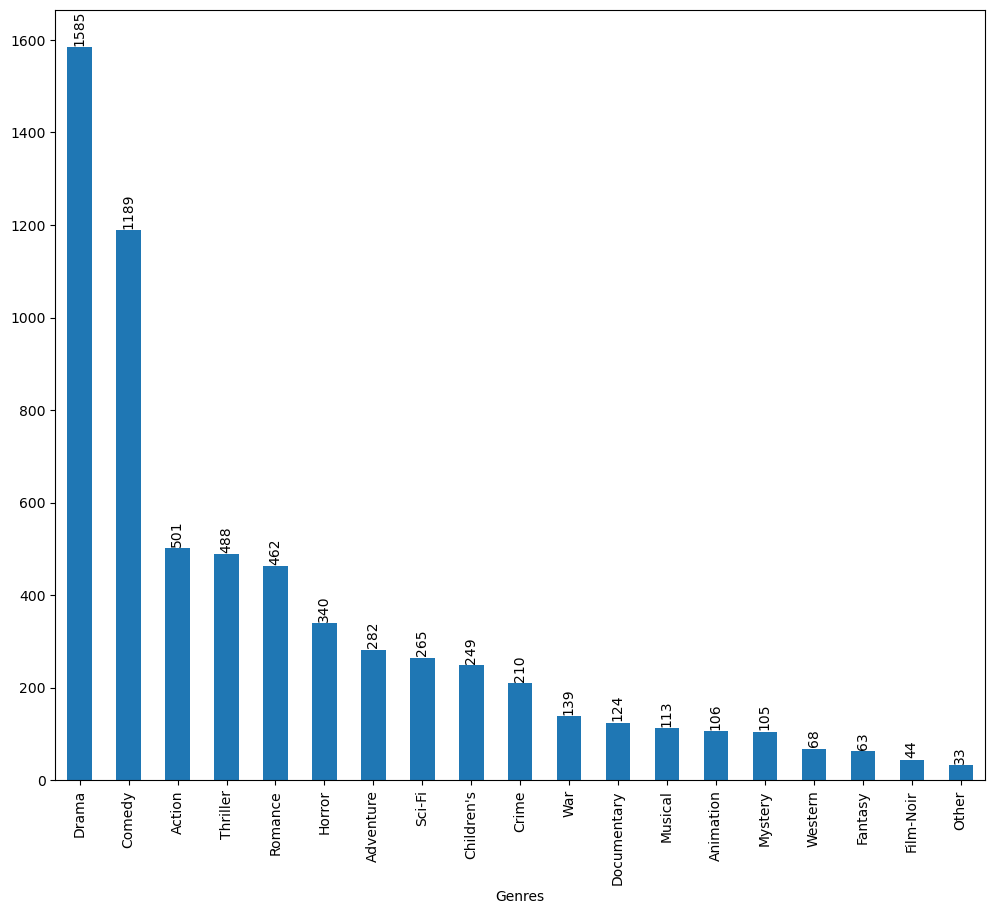

In [21]:
plt.figure(figsize=(12,10))
ax=movies.Genres.value_counts().plot(kind='bar')
for patch in ax.patches:
    ax.annotate(patch.get_height(),(patch.get_x()+0.2*patch.get_width(),patch.get_height()+10),rotation=90)
plt.show()

This plot shows that, Most of the movies are under **Drama** Genre followed by Comedy, Action and Thriller. 

**Extracting the Release year from the dataset**.

In [22]:
movies['Release year']=movies.Title.str.findall('\(\d{4}\)').apply(lambda x:int(x[-1][1:-1]) if len(x)!=0 else None)
movies.head()

,Movie ID,Title,Genres,Release year
0,1,Toy Story (1995),Animation,1995.0
0,1,Toy Story (1995),Children's,1995.0
0,1,Toy Story (1995),Comedy,1995.0
1,2,Jumanji (1995),Adventure,1995.0
1,2,Jumanji (1995),Children's,1995.0


Distribution between the Release year and the number of movies that were released in that particular year.

In [23]:
movies['Release year'].nunique()

81

We have the dataset of movies which was released over the last 81 years. Lets take a sample of last 10 years (ie:: from 1991 to 2000) and see the number of movies that were released.

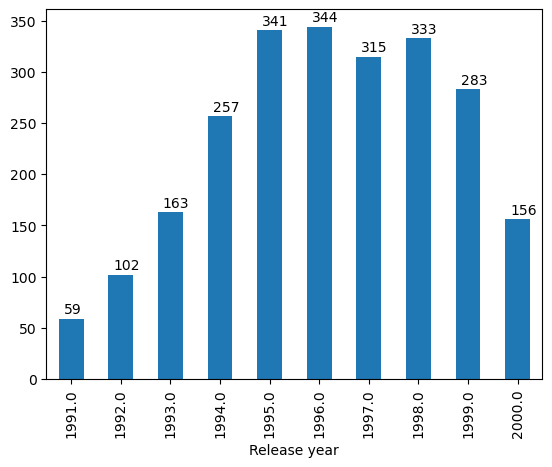

In [24]:
ax=movies.groupby('Release year')['Movie ID'].agg('nunique').tail(10).plot(kind='bar')
for patch in ax.patches:
    ax.annotate(patch.get_height(),(patch.get_x()+patch.get_width()*0.2,patch.get_height()+5))
plt.show()

So over the 10 years (ie:: from 1991 to 2000), Most number of movies were released in the year 1996 and the number is about 344.

In [25]:
orig_movies=movies.copy()   #Storing the copy of the movies dataframe before proceeding further.

###### Checking Number of Movies released in each of the Decade

In [26]:
orig_movies.groupby("Release year")['Movie ID'].nunique()

Release year
1919.0      3
1920.0      2
1921.0      1
1922.0      2
1923.0      3
         ... 
1996.0    344
1997.0    315
1998.0    333
1999.0    283
2000.0    156
Name: Movie ID, Length: 81, dtype: int64

In [27]:
def findDecade(x):
    if x>=1919 and x< 1929:
        return "1919-1929"
    elif x>=1929 and x<1939:
        return "1929-1939"
    elif x>=1939 and x<1949:
        return "1939-1949"
    elif x>=1949 and x<1959:
        return "1949-1959"
    elif x>=1959 and x<1969:
        return "1959-1969"
    elif x>=1969 and x<1979:
        return "1969-1979"
    elif x>=1979 and x<1989:
        return "1979-1989"
    else:
        return "1989-2000"

In [28]:
orig_movies['Decade']=orig_movies['Release year'].apply(findDecade)
orig_movies.head()

,Movie ID,Title,Genres,Release year,Decade
0,1,Toy Story (1995),Animation,1995.0,1989-2000
0,1,Toy Story (1995),Children's,1995.0,1989-2000
0,1,Toy Story (1995),Comedy,1995.0,1989-2000
1,2,Jumanji (1995),Adventure,1995.0,1989-2000
1,2,Jumanji (1995),Children's,1995.0,1989-2000


###### Pivotting the Table

In [29]:
movies=movies.pivot(index='Movie ID',columns='Genres',values='Title')

In [30]:
movies=movies.notna().astype(int)
movies.head()

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Other,Romance,Sci-Fi,Thriller,War,Western
Movie ID,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Movies dataset is prepared now for further processing.

###### Users

In [31]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Checking the data types of the features

In [32]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   object
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   object
 3   Occupation  6040 non-null   object
 4   Zip-code    6040 non-null   object
dtypes: object(5)
memory usage: 236.1+ KB


In [33]:
users.UserID=users.UserID.astype('int')
users.Age=users.Age.astype('int')
users.Occupation=users.Occupation.astype('int')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int32 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int32 
 3   Occupation  6040 non-null   int32 
 4   Zip-code    6040 non-null   object
dtypes: int32(3), object(2)
memory usage: 165.3+ KB


- Removing the UserID column from the dataframe and making it as the index of the dataframe.

In [34]:
users.index=users.UserID
users.drop('UserID',axis=1,inplace=True)
users.head()

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


Mapping Gender feature

In [35]:
users.Gender=users.Gender.map({'F':0,'M':1})    #Label encoding the Gender feature.
users.head()

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,0,1,10,48067
2,1,56,16,70072
3,1,25,15,55117
4,1,45,7,02460
5,1,25,20,55455


The Occupation feature we have is already label encoded and each of the encoded value refers to the below occupations.
<br><br>
0: "other" or not specified

1: "academic/educator"

2: "artist"

3: "clerical/admin"

4: "college/grad student"

5: "customer service"

6: "doctor/health care"

7: "executive/managerial"

8: "farmer"

9: "homemaker"

10: "K-12 student"

11: "lawyer"

12: "programmer"

13: "retired"

14: "sales/marketing"

15: "scientist"

16: "self-employed"

17: "technician/engineer"

18: "tradesman/craftsman"

19: "unemployed"

20: "writer"

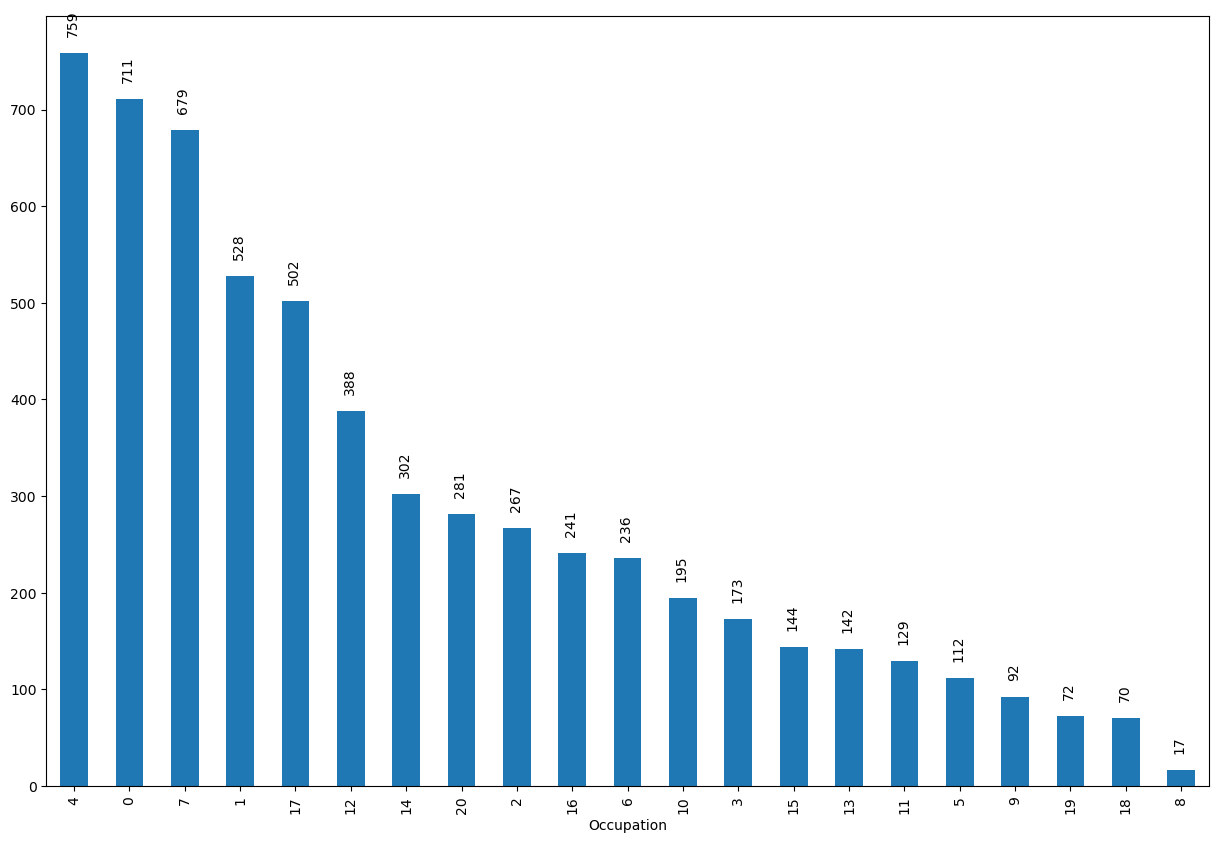

In [36]:
plt.figure(figsize=(15,10))
ax=users.Occupation.value_counts().plot(kind='bar')
for patch in ax.patches:
    ax.annotate(patch.get_height(),(patch.get_x()+0.2*patch.get_width(),patch.get_height()+20),rotation=90)
plt.show()   

From the plot above, we can see that most number of users have their Occupation feature set as 4. Which means that most number of users are **College or Grad student**.

Distribution of Age feature

The age of the users has been bucketed to different categories as below:
<br><br>
1: "Under 18"

18: "18-24"

25: "25-34"

35: "35-44"

45: "45-49"

50: "50-55"

56: "56+"

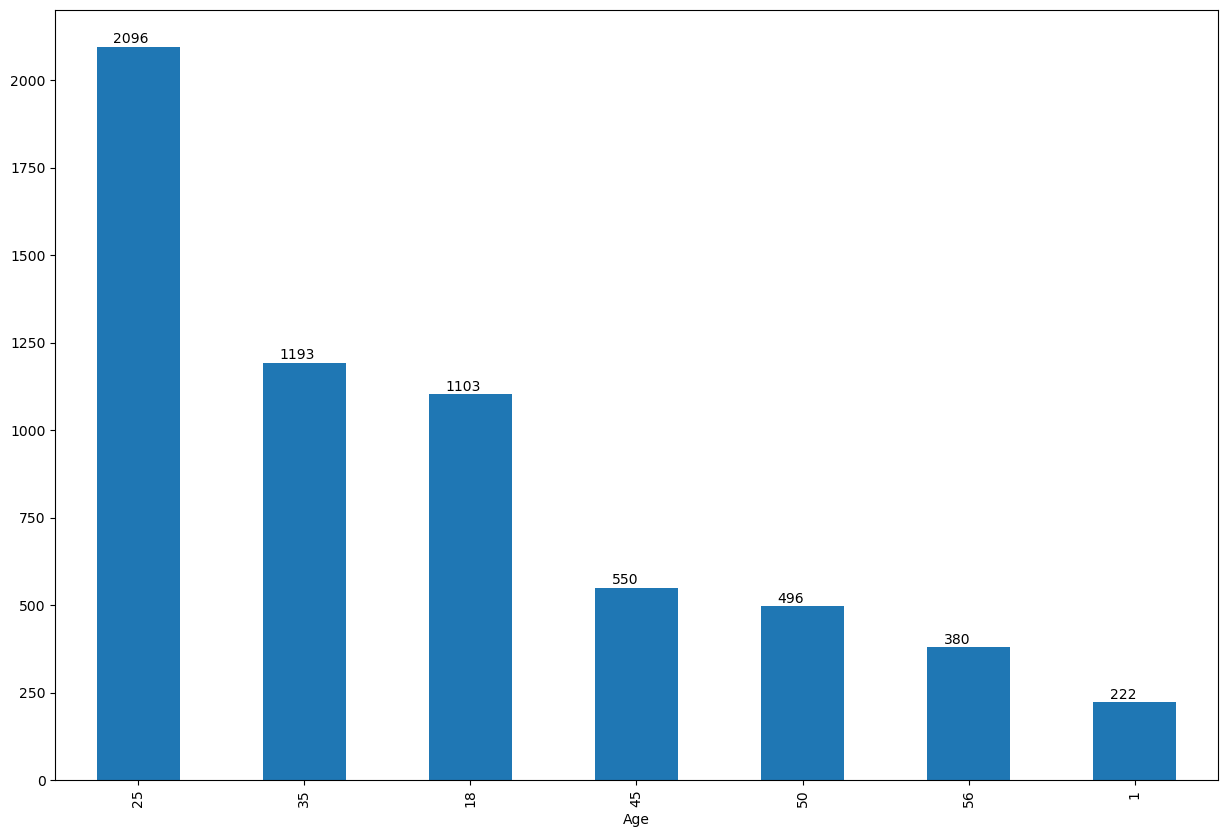

In [37]:
plt.figure(figsize=(15,10))
ax=users.Age.value_counts().plot(kind='bar')
for patch in ax.patches:
    ax.annotate(patch.get_height(),(patch.get_x()+0.2*patch.get_width(),patch.get_height()+10))
plt.show()

From the above distribution, we can see that about 2096 users are in the age gap between 25 and 34. About 1193 are in the category between 35 and 44. There are about 222 users using the app who are below 18 years.

##### Ratings

In [38]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Lets do some feature engineering to extract Hours from the Time stamp feature. 

In [39]:
import datetime as dt

In [40]:
ratings['date']=ratings.Timestamp.apply(lambda x:dt.datetime.fromtimestamp(int(x)).date())
ratings['hour']=ratings.Timestamp.apply(lambda x: dt.datetime.fromtimestamp(int(x)).hour)

In [41]:
ratings.head()

,UserID,MovieID,Rating,Timestamp,date,hour
0,1,1193,5,978300760,2001-01-01,3
1,1,661,3,978302109,2001-01-01,4
2,1,914,3,978301968,2001-01-01,4
3,1,3408,4,978300275,2001-01-01,3
4,1,2355,5,978824291,2001-01-07,5


We have extracted the Hour and date from the Timestamp feature

##### Number of movies that were rated on a particular date.

Let's check for the dates from 26th April 2000 to 5th May 2000.

In [42]:
ratings.groupby('date')['hour'].agg('count')[:10]

date
2000-04-26    3181
2000-04-27    2580
2000-04-28    2189
2000-04-29    2376
2000-04-30     913
2000-05-01    1282
2000-05-02    1754
2000-05-03    2093
2000-05-04    1490
2000-05-05    2953
Name: hour, dtype: int64

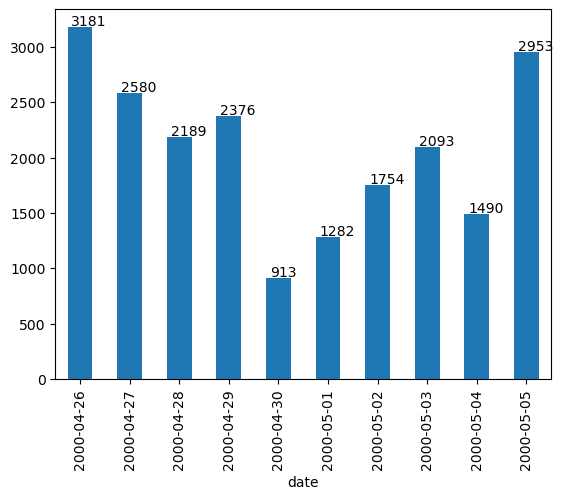

In [43]:
ax=ratings.groupby('date')['hour'].agg('count')[:10].plot(kind='bar')
for patch in ax.patches:
    ax.annotate(patch.get_height(),(patch.get_x()+patch.get_width()*0.15,patch.get_height()+15))
plt.show()

###### Number of movies under each ratings

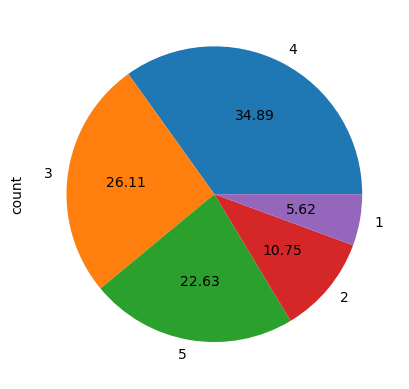

In [44]:
ratings.Rating.value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

From the Pie chart above, we can see that about 34.89% of the movies are been rated as 4 and about 22.63% of the movies are rated as 5. Only 5.62% of the movies have the ratings as 1.

Changing the datatype of features in the dataset

In [45]:
ratings.UserID=ratings.UserID.astype('int')
ratings.MovieID=ratings.MovieID.astype('int')
ratings.Rating=ratings.Rating.astype('int')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  int32 
 1   MovieID    1000209 non-null  int32 
 2   Rating     1000209 non-null  int32 
 3   Timestamp  1000209 non-null  object
 4   date       1000209 non-null  object
 5   hour       1000209 non-null  int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 34.3+ MB


**Getting the 1000 Popular movies (ie: Those movies which has more number of views)**

As we have more number of movies in the dataset, filtering out 1000 popular movies from the dataset for further process.

In [46]:
popular_movies=ratings.MovieID.value_counts()[:1000].index.to_list()
print(popular_movies[:20])   #Just printing 20 Popular movie ID's

[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608, 2762, 110, 2396, 1197, 527, 1617, 1265]


**Filtering out the dataset's to only have popular movies**

In [47]:
movies=movies.loc[movies.index.isin(popular_movies)]

In [48]:
ratings=ratings.loc[ratings.MovieID.isin(popular_movies)]

##### Building the Item-based Recommendation system using Pearson-correlation

In [49]:
from scipy.stats import pearsonr
def findPearson(vec1,vec2):
    return pearsonr(vec1,vec2)

In [50]:
movies.head()

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Other,Romance,Sci-Fi,Thriller,War,Western
Movie ID,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [51]:
movies.shape

(1000, 19)

we will calculate the pearson correlation calculation for all the 1000 movies

In [52]:
rankings = []
for i in movies.index[:1000]:
    for j in movies.index[:1000]:
        if i==j:
            continue
        rankings.append([i,j,findPearson(movies.loc[i],movies.loc[j])[0]])

In [53]:
rankings=pd.DataFrame(rankings,columns=['QueryMovie','CandidateMovie','Correlation'])
rankings.head()

,QueryMovie,CandidateMovie,Correlation
0,1,2,0.208333
1,1,3,0.321798
2,1,6,-0.187500
3,1,7,0.321798
4,1,10,-0.187500


Now from the existing movies table we will map the query movie title and Candidate movie title

In [54]:
rankings.shape

(999000, 3)

Merging the titles of the QueryMovie and CandidateMovie

In [55]:
rankings['QueryMovieTitle']=rankings.QueryMovie.apply(lambda x:orig_movies.loc[orig_movies['Movie ID']==x]['Title'].values[0])
rankings.head()

,QueryMovie,CandidateMovie,Correlation,QueryMovieTitle
0,1,2,0.208333,Toy Story (1995)
1,1,3,0.321798,Toy Story (1995)
2,1,6,-0.187500,Toy Story (1995)
3,1,7,0.321798,Toy Story (1995)
4,1,10,-0.187500,Toy Story (1995)


Similarly map the title's of the Candidate movies

In [56]:
rankings['CandidateMovieTitle']=rankings.CandidateMovie.apply(lambda x:orig_movies.loc[orig_movies['Movie ID']==x]['Title'].values[0])
rankings.head()

,QueryMovie,CandidateMovie,Correlation,QueryMovieTitle,CandidateMovieTitle
0,1,2,0.208333,Toy Story (1995),Jumanji (1995)
1,1,3,0.321798,Toy Story (1995),Grumpier Old Men (1995)
2,1,6,-0.187500,Toy Story (1995),Heat (1995)
3,1,7,0.321798,Toy Story (1995),Sabrina (1995)
4,1,10,-0.187500,Toy Story (1995),GoldenEye (1995)


##### Function to recommend the movie based on the item-item approach:

Sorting the rankings dataframe.

- Here, When the correlation between 2 movies is high, then its more likely that those movies are similar to each other and it can be recommended to the users.

In [57]:
rankings.sort_values(by=['QueryMovie','Correlation'],ascending=[True,False],inplace=True)

In [58]:
def item_recommend(title):
    return(rankings.loc[rankings['QueryMovieTitle'].str.contains(title)]['CandidateMovieTitle'][:10])

In [59]:
def printMovies(result):
    print('*'*10,'The Recommended Movies','*'*10)
    for movie in result:
        print(movie)
    print('*'*20)

In [60]:
def get_movie_item_recommendation():
    title=input("Please enter your favorite movie name :")
    results=item_recommend(title)
    print()
    printMovies(results)

In [143]:
get_movie_item_recommendation()

Please enter your favorite movie name :Home Alone

********** The Recommended Movies **********
101 Dalmatians (1996)
Mighty Ducks, The (1992)
Babe: Pig in the City (1998)
Home Alone 2: Lost in New York (1992)
Stuart Little (1999)
Muppet Movie, The (1979)
Great Muppet Caper, The (1981)
Muppets Take Manhattan, The (1984)
Toy Story (1995)
Babe (1995)
********************


In [144]:
get_movie_item_recommendation()

Please enter your favorite movie name :Toy Story

********** The Recommended Movies **********
American Tail, An (1986)
Bug's Life, A (1998)
Toy Story 2 (1999)
Chicken Run (2000)
Aladdin (1992)
Jungle Book, The (1967)
Home Alone (1990)
101 Dalmatians (1996)
Mighty Ducks, The (1992)
Babe: Pig in the City (1998)
********************


From the above recommendations, we can see that when we enter "**Home Alone**" as the title, we got "**Home Alone 2**" in the recommendations and while typing "**Toy Story**" we got "**Toy Story 2**" in the recommended movies. This shows the pretty decent working of our item-based recommendation system.

##### User based Recommender system using Pearson Correlation

In [48]:
users.head()

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,0,1,10,48067
2,1,56,16,70072
3,1,25,15,55117
4,1,45,7,02460
5,1,25,20,55455


Proceeding with One-hot encoding to encode all the label encoded features.

In [49]:
users_bfr_encode=users.copy()

In [50]:
users.Age=users.Age.map({1:"Under 18",18:"18-24",25:"25-34",35:"35-44",45:"45-49",50:"50-55",56:"56+"})
age=pd.get_dummies(users.Age,drop_first=True,dtype=int)
users.head()

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,0,Under 18,10,48067
2,1,56+,16,70072
3,1,25-34,15,55117
4,1,45-49,7,02460
5,1,25-34,20,55455


In [51]:
age.head()

,25-34,35-44,45-49,50-55,56+,Under 18
UserID,,,,,,
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
5,1,0,0,0,0,0


In [52]:
occupation=pd.get_dummies(users.Occupation,drop_first=True,dtype=int,prefix='Occupation')
occupation.head()

,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
UserID,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Dropping the Zip-code feature from the dataset

In [53]:
users['Zip-code'].value_counts()

Zip-code
48104    19
22903    18
55104    17
94110    17
55455    16
         ..
80236     1
19428     1
33073     1
99005     1
14706     1
Name: count, Length: 3439, dtype: int64

There are about 3439 zip codes available in the dataset which makes it impossible to do the encoding for all.... Thus it can be dropped to proceed further.

In [54]:
users.drop(['Age','Occupation','Zip-code'],axis=1,inplace=True)
users.head()

,Gender
UserID,
1,0
2,1
3,1
4,1
5,1


In [55]:
users=users.merge(age,left_index=True,right_index=True)
users=users.merge(occupation,left_index=True,right_index=True)
users.head()

,Gender,25-34,35-44,45-49,50-55,56+,Under 18,Occupation_1,Occupation_2,Occupation_3,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


No of users in the application

In [56]:
users.shape

(6040, 27)

Since there are about 6040 users in the application, it is impossible for us to compute the pearson correlation for all the users to get the similar users. Thus we will apply this concept only for 1000 users who had actively used the OTT platform to see movies.

In [57]:
active_user_index=ratings.groupby('UserID')['MovieID'].agg('count').sort_values(ascending=False).index[:1000].to_list()
active_user_index[:10]  #Just displaying 10 indices

[4169, 1680, 4277, 1941, 1181, 889, 3618, 2063, 1150, 1015]

In [58]:
active_users=users.loc[users.index.isin(active_user_index)]
active_users.head()

,Gender,25-34,35-44,45-49,50-55,56+,Under 18,Occupation_1,Occupation_2,Occupation_3,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
UserID,,,,,,,,,,,,,,,,,,,,,
10,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
similar_users = []
for user1 in active_users.index:
    for user2 in active_users.index:
        if user1==user2:
            continue
        similar_users.append([user1,user2,findPearson(active_users.loc[user1],active_users.loc[user2])[0]])

In [75]:
similar_users=pd.DataFrame(similar_users,columns=['User1','User2','Correlation'])
similar_users.sort_values(by=['User1','Correlation'],ascending=[True,False],inplace=True)

Now from this, we will recommend 2 movies which are highly rated by each user out of 5 users who are similar to the user ID that that we are using to search

In [76]:
ratings.sort_values(by=['UserID','Rating'],ascending=[True,False],inplace=True)
def findSimilarUsers(user):
    results=[]
    sim_users=similar_users.loc[similar_users.User1==user]['User2'].values[:5]
    for u in sim_users:
        results.extend(ratings.loc[ratings.UserID==u]['MovieID'].values[:2])
    results=np.unique(orig_movies.loc[orig_movies['Movie ID'].isin(results)]['Title'].values) 
    return results      

In [77]:
findSimilarUsers(10)

array(['Being John Malkovich (1999)',
       'Bridge on the River Kwai, The (1957)',
       'Dances with Wolves (1990)', 'Doctor Zhivago (1965)',
       'Home Alone (1990)', 'Honey, I Blew Up the Kid (1992)',
       'Touch of Evil (1958)', 'Toy Story (1995)'], dtype=object)

Defining a function to properly display the user-based recommendations

In [78]:
def get_user_based_recommendation():
    userID=int(input("Please enter your user ID :"))
    results=findSimilarUsers(userID)
    print()
    printMovies(results)

In [145]:
get_user_based_recommendation()

Please enter your user ID :10

********** The Recommended Movies **********
Being John Malkovich (1999)
Bridge on the River Kwai, The (1957)
Dances with Wolves (1990)
Doctor Zhivago (1965)
Home Alone (1990)
Honey, I Blew Up the Kid (1992)
Touch of Evil (1958)
Toy Story (1995)
********************


In [146]:
get_user_based_recommendation()

Please enter your user ID :6040

********** The Recommended Movies **********
Being John Malkovich (1999)
Bridge on the River Kwai, The (1957)
For Your Eyes Only (1981)
Live and Let Die (1973)
Nikita (La Femme Nikita) (1990)
Shining, The (1980)
Who Framed Roger Rabbit? (1988)
X-Men (2000)
********************


In [147]:
get_user_based_recommendation()

Please enter your user ID :6010

********** The Recommended Movies **********
Beavis and Butt-head Do America (1996)
Being John Malkovich (1999)
Chinatown (1974)
Contender, The (2000)
Dances with Wolves (1990)
Day the Earth Stood Still, The (1951)
Groundhog Day (1993)
Last of the Mohicans, The (1992)
Nikita (La Femme Nikita) (1990)
X-Men (2000)
********************


##### Build Recommendation System based on Cosine Similarity

###### Building Item-similarity matrix and User-similarity matrix

In [82]:
active_users.head()

,Gender,25-34,35-44,45-49,50-55,56+,Under 18,Occupation_1,Occupation_2,Occupation_3,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
UserID,,,,,,,,,,,,,,,,,,,,,
10,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
user_sim=[]
for user1 in active_users.index:
    for user2 in active_users.index:
        user_sim.append([user1,user2,cosine_similarity(X=np.array(users.loc[user1]).reshape(1,-1),Y=np.array(users.loc[user2]).reshape(1,-1))])
user_sim=pd.DataFrame(user_sim,columns=['User1','User2','Cosine_similarity'])
user_sim.head()

,User1,User2,Cosine_similarity
0,10,10,[[0.9999999999999998]]
1,10,18,[[0.0]]
2,10,22,[[0.0]]
3,10,23,[[0.4999999999999999]]
4,10,26,[[0.0]]


In [85]:
user_sim.Cosine_similarity=user_sim.Cosine_similarity.apply(lambda x:x[-1][-1])
user_sim.head()

,User1,User2,Cosine_similarity
0,10,10,1.0
1,10,18,0.0
2,10,22,0.0
3,10,23,0.5
4,10,26,0.0


Creating the Pivot table --- User-similarity matrix

In [86]:
user_sim_pv = user_sim.pivot_table(values='Cosine_similarity',index='User1',columns='User2').round(2)
user_sim_pv.head()

User2,10,18,22,23,26,33,36,48,53,58,...,5972,5978,5996,6000,6002,6007,6010,6016,6036,6040
User1,,,,,,,,,,,,,,,,,,,,,
10,1.0,0.0,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.82,0.00,0.00,0.00,0.41,0.50,0.41,0.00,0.00
18,0.0,1.0,0.00,0.00,0.00,0.58,0.58,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22,0.0,0.0,1.00,0.50,0.41,0.41,0.41,0.41,0.50,0.41,...,0.00,0.41,0.00,0.41,0.50,0.41,0.50,0.41,0.50,0.41
23,0.5,0.0,0.50,1.00,0.41,0.41,0.41,0.41,0.50,0.41,...,0.00,0.82,0.00,0.41,0.50,0.82,1.00,0.41,0.00,0.41
26,0.0,0.0,0.41,0.41,1.00,0.33,0.67,0.67,0.82,0.67,...,0.41,0.33,0.58,0.33,0.41,0.33,0.41,0.33,0.41,0.67


###### Item-similarity matrix

In [87]:
item_sim = []
for movie1 in popular_movies:
    for movie2 in popular_movies:
        item_sim.append([movie1,movie2,cosine_similarity(np.array(movies.loc[movie1]).reshape(1,-1),np.array(movies.loc[movie2]).reshape(1,-1))[-1][-1]])
item_sim=pd.DataFrame(item_sim,columns=['Movie1','Movie2','Cosine_similarity'])
item_sim.head()

,Movie1,Movie2,Cosine_similarity
0,2858,2858,1.0
1,2858,260,0.0
2,2858,1196,0.0
3,2858,1210,0.0
4,2858,480,0.0


Creating the Pivotted table ----- Item-similarity matrix

In [88]:
item_sim_pv=item_sim.pivot_table(values='Cosine_similarity',index='Movie1',columns='Movie2').round(2)
item_sim_pv.head()

Movie2,1,2,3,6,7,10,11,16,17,19,...,3863,3868,3869,3893,3897,3911,3916,3927,3948,3952
Movie1,,,,,,,,,,,,,,,,,,,,,
1,1.00,0.33,0.41,0.0,0.41,0.00,0.33,0.00,0.0,0.58,...,0.00,0.58,0.58,0.41,0.41,0.58,0.0,0.00,0.58,0.00
2,0.33,1.00,0.00,0.0,0.00,0.33,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.41,0.00,0.00
3,0.41,0.00,1.00,0.0,1.00,0.00,0.82,0.00,0.5,0.71,...,0.00,0.71,0.71,0.50,0.50,0.71,0.0,0.00,0.71,0.00
6,0.00,0.00,0.00,1.0,0.00,0.67,0.00,0.41,0.0,0.00,...,0.41,0.00,0.00,0.41,0.00,0.00,0.0,0.00,0.00,0.41
7,0.41,0.00,1.00,0.0,1.00,0.00,0.82,0.00,0.5,0.71,...,0.00,0.71,0.71,0.50,0.50,0.71,0.0,0.00,0.71,0.00


Recommending k-items based on the Cosine similarity.

In [89]:
def get_movie_recommendation_basedOn_similarity():
    movieName=input("Please enter a movie name !")
    movieID=orig_movies.loc[orig_movies.Title.str.contains(movieName)]['Movie ID'].unique().min()
    num=int(input("Please enter the number of recommendations required !"))
    movieIndices=item_sim_pv.loc[movieID].sort_values(ascending=False).index.to_list()
    movieIndices.remove(movieID)
    movieIndices=movieIndices[:num]
    movies=orig_movies.loc[orig_movies['Movie ID'].isin(movieIndices)]['Title'].unique()
    print()
    printMovies(movies)

In [134]:
get_movie_recommendation_basedOn_similarity()

Please enter a movie name !Home Alone
Please enter the number of recommendations required !10

********** The Recommended Movies **********
Toy Story (1995)
101 Dalmatians (1996)
Mighty Ducks, The (1992)
Babe: Pig in the City (1998)
Home Alone 2: Lost in New York (1992)
Toy Story 2 (1999)
Stuart Little (1999)
Muppet Movie, The (1979)
Great Muppet Caper, The (1981)
Muppets Take Manhattan, The (1984)
********************


In [148]:
get_movie_recommendation_basedOn_similarity()

Please enter a movie name !Jumanji
Please enter the number of recommendations required !10

********** The Recommended Movies **********
Indian in the Cupboard, The (1995)
Space Jam (1996)
20,000 Leagues Under the Sea (1954)
Willy Wonka and the Chocolate Factory (1971)
Labyrinth (1986)
Goonies, The (1985)
Honey, I Shrunk the Kids (1989)
NeverEnding Story, The (1984)
Ladyhawke (1985)
Hook (1991)
********************


In [149]:
get_movie_recommendation_basedOn_similarity()

Please enter a movie name !Toy Story
Please enter the number of recommendations required !10

********** The Recommended Movies **********
Aladdin (1992)
101 Dalmatians (1996)
Mulan (1998)
Bambi (1942)
Jungle Book, The (1967)
American Tail, An (1986)
Bug's Life, A (1998)
Tarzan (1999)
Toy Story 2 (1999)
Chicken Run (2000)
********************


##### Using Nearest neighbors algorithm

In [93]:
from sklearn.neighbors import NearestNeighbors
nearestneighs = NearestNeighbors(n_neighbors=2).fit(movies)

In [94]:
def get_nearest_neighbor_recommendation():
    movieName=input("Please enter your favorite Movie name !..")
    num_recommendations = int(input("Please enter the number of recommendations required !!.."))
    movieId = orig_movies.loc[orig_movies.Title.str.contains(movieName)]['Movie ID'].unique().min()
    movie = movies.loc[movies.index==movieId]
    neighbors=nearestneighs.kneighbors(movie,n_neighbors=15,return_distance=False)
    result = orig_movies.loc[orig_movies['Movie ID'].isin(neighbors[-1])]['Title'].unique()[:num_recommendations]
    print()
    printMovies(result)

In [150]:
get_nearest_neighbor_recommendation()

Please enter your favorite Movie name !..Home Alone
Please enter the number of recommendations required !!..10

********** The Recommended Movies **********
Awfully Big Adventure, An (1995)
Corrina, Corrina (1994)
When a Man Loves a Woman (1994)
Age of Innocence, The (1993)
So I Married an Axe Murderer (1993)
Tombstone (1993)
Carried Away (1996)
Run of the Country, The (1995)
Independence Day (ID4) (1996)
Time to Kill, A (1996)
********************


In [151]:
get_nearest_neighbor_recommendation()

Please enter your favorite Movie name !..Heat
Please enter the number of recommendations required !!..10

********** The Recommended Movies **********
Grumpier Old Men (1995)
Pocahontas (1995)
Mr. Wrong (1996)
Fluke (1995)
In the Army Now (1994)
Window to Paris (1994)
Promise, The (Versprechen, Das) (1994)
Mrs. Winterbourne (1996)
Marlene Dietrich: Shadow and Light (1996)
Joe's Apartment (1996)
********************


From the above, We can see that this nearest neighbors algorithm did not return results as good as the Pearson correlation model or the Cosine Similarity model. It can be fine tuned to generate relevant recommendations.

##### Recommendation system using Matrix Factorization

To perform the matrix factorization, we will need to have interaction matrix.

In [97]:
interaction=ratings.pivot_table(values='Rating',index='UserID',columns='MovieID').fillna(0)
interaction

MovieID,1,2,3,6,7,10,11,16,17,19,...,3863,3868,3869,3893,3897,3911,3916,3927,3948,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The above is an interaction matrix and it can be noted that it is highly sparse. This is because its obvious that we will not have an user in the system who would have watched every movie available in the OTT platform.

Because of this Sparsity, we will not be able to directly recommend the movies using this interaction matrix.

To overcome this, we should perform the Matrix Factorization.

**We have Collective Matrix Factorization for Recommender System** package available as open source which can be used to build Matrix factorization based Recommender systems. This was initially developed for Netflix Price Problem and later it was kept as open source!.

In [98]:
from cmfrec import CMF     #CMF module from cmfrec library is used to generate the Collective Matrix Factorization algorithm to get the A and B matrices.

In [99]:
mf_ratings=ratings[['UserID','MovieID','Rating']].copy()
mf_ratings.columns=['UserId','ItemId','Rating']
mf_ratings.head()

,UserId,ItemId,Rating
0,1,1193,5
4,1,2355,5
6,1,1287,5
7,1,2804,5
10,1,595,5


The Value of Un-interpretable dimensions to be considered for Matrix Factorization is 4.

In [100]:
dimensions=4
model=CMF(k=dimensions,lambda_=0.01,method='als',user_bias=False,item_bias=False,verbose=False)
model.fit(mf_ratings)

Collective matrix factorization model
(explicit-feedback variant)


The Factorized matrix A and B for the Ratings matrix

In [101]:
model.A_    #The A matrix

array([[-0.06893215, -0.02060567, -0.02475843,  0.04249249],
       [ 0.01314655,  0.0083998 , -0.17972393,  0.02527723],
       [-0.06068762, -0.01212709, -0.07045514, -0.00797077],
       ...,
       [ 0.12169748,  0.01992569, -0.14384876,  0.0591489 ],
       [ 0.023429  , -0.0283812 , -0.09700353, -0.0035194 ],
       [ 0.09919889, -0.05448395, -0.03944656, -0.10031328]],
      dtype=float32)

In [102]:
model.B_    #The B matrix

array([[  0.9753785 , -11.32347   ,  -3.6423392 ,   0.93188727],
       [ -1.905294  ,  -3.611689  ,  -0.8051432 ,   5.6054335 ],
       [ -6.452924  ,  -7.512701  ,  -4.1347766 ,   3.2180989 ],
       ...,
       [ -3.5962203 ,   8.311478  ,   2.826594  ,  11.258204  ],
       [ -4.3814716 ,  -2.172471  ,   4.6980863 ,   4.0639205 ],
       [  8.572248  ,  -5.972288  ,   2.6777453 ,   3.8398714 ]],
      dtype=float32)

In [103]:
print(model.A_.shape,model.B_.shape)

(6040, 4) (1000, 4)


Performing Matrix completion using the A and B matrix

Here while calculating the dot product of A and B matrix, we will get the completed matrix which might have negative values in some of its cells. To correct this as per the formulation we have to add **Mu** (Constant) to the dot product.

In [104]:
completed_mat = np.dot(model.A_,model.B_.T)
print(completed_mat)

[[ 0.2958696   0.4638802   0.83873373 ...  0.4850387   0.40315834
  -0.37097156]
 [ 0.595879    0.23100781  0.67652404 ... -0.20089355 -0.8174834
  -0.32166412]
 [ 0.32732105  0.17147388  0.7483853  ... -0.17143272 -0.07115011
  -0.6670705 ]
 ...
 [ 0.47213927  0.14353919 -0.1498708  ... -0.01273077 -1.0119395
   0.76615286]
 [ 0.6942659   0.11623893  0.4517961  ... -0.6339573  -0.51102966
   0.09707511]
 [ 0.76390094 -0.52276325 -0.39051655 ... -2.05043    -0.9092608
   0.6849333 ]]


Adding the **Mu** :::: Here in our case the constant that we have to add is the global mean of the overall completed matrix. We will get it from one of the attributes of the model.

In [105]:
constant=model.glob_mean_
print(constant)

3.7055768966674805


In [106]:
completed_mat+=constant
completed_mat

array([[4.0014467, 4.169457 , 4.5443106, ..., 4.1906157, 4.108735 ,
        3.3346052],
       [4.301456 , 3.9365847, 4.382101 , ..., 3.5046833, 2.8880935,
        3.3839128],
       [4.032898 , 3.8770509, 4.4539623, ..., 3.5341442, 3.6344268,
        3.0385065],
       ...,
       [4.1777163, 3.849116 , 3.555706 , ..., 3.692846 , 2.6936374,
        4.4717298],
       [4.3998427, 3.8218157, 4.157373 , ..., 3.0716195, 3.1945472,
        3.8026521],
       [4.4694777, 3.1828136, 3.3150604, ..., 1.6551468, 2.7963161,
        4.39051  ]], dtype=float32)

In [107]:
completed_mat.shape    #Shape of the completed interaction matrix

(6040, 1000)

Converting the interaction matrix into DataFrame with appropriate index and columns.

In [108]:
interaction_cmplt=pd.DataFrame(completed_mat,index=interaction.index,columns=interaction.columns)
interaction_cmplt.head()

MovieID,1,2,3,6,7,10,11,16,17,19,...,3863,3868,3869,3893,3897,3911,3916,3927,3948,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,4.001447,4.169457,4.544311,4.198262,4.395609,4.240242,4.180369,4.538366,4.293055,3.949179,...,3.921927,4.416845,3.709796,3.513360,4.138933,4.360494,3.608500,4.190616,4.108735,3.334605
2,4.301456,3.936585,4.382101,4.189496,4.509472,4.921447,4.245500,4.300561,5.092202,3.029780,...,3.253639,3.773158,3.673185,0.707116,2.551739,3.878682,3.700516,3.504683,2.888093,3.383913
3,4.032898,3.877051,4.453962,4.156075,4.044670,3.986972,3.872557,4.363399,4.426081,3.163996,...,3.368329,3.806269,3.235898,2.488642,3.707405,3.795452,3.221480,3.534144,3.634427,3.038507
4,5.374218,3.937351,4.235827,4.797273,3.911104,3.951325,3.838003,3.832199,5.263407,1.708005,...,2.553489,2.147213,3.858084,0.413889,3.016861,1.667876,4.632011,2.006361,3.359379,5.017273
5,4.132083,2.843244,2.833678,3.597667,2.234107,2.312489,2.578830,2.510734,3.586024,1.411921,...,2.183787,1.195246,2.971735,1.904354,2.889154,0.991543,3.615219,1.356428,2.837543,4.372353


In [109]:
def show_matrx_fact_rec():
    result=[]
    userId=int(input("Please enter your user ID !..."))
    num_recommendations=int(input("Please enter the number of recommendations to be provided!..."))
    movies_rated = interaction_cmplt.loc[userId].sort_values(ascending=False).index.to_list()[:num_recommendations]
    for movie in movies_rated:
        result.append(orig_movies.loc[orig_movies['Movie ID']==movie]['Title'].values[:1][-1])
    print()
    printMovies(result)    

In [132]:
show_matrx_fact_rec()

Please enter your user ID !...10
Please enter the number of recommendations to be provided!...10

********** The Recommended Movies **********
GoldenEye (1995)
No Way Out (1987)
Red Violin, The (Le Violon rouge) (1998)
Get Shorty (1995)
Apostle, The (1997)
Amadeus (1984)
Legends of the Fall (1994)
Sabrina (1995)
Cop Land (1997)
City of Lost Children, The (1995)
********************


###### Model Evaluation using RMSE and MAE

In [111]:
from sklearn.metrics import (mean_squared_error as mse, mean_absolute_error as mae)

In [112]:
#For d=4
def printMetrics():
    rmse_val=mse(interaction.values[interaction>0],interaction_cmplt.values[interaction>0])**(0.5)
    mae_val=mae(interaction.values[interaction>0],interaction_cmplt.values[interaction>0])**(0.5)
    print('*'*40)
    print(f'The RMSE value is {rmse_val}')
    print(f'The MAE value is {mae_val}')
    print('*'*40)

In [113]:
printMetrics()

****************************************
The RMSE value is 1.1939955311815287
The MAE value is 0.9735870214564843
****************************************


While we increase the number of dimensions in the embeddings matrix, the RMSE value will decrease eventually.

In [114]:
rmse_values=[]
for k in range(1,11):
    model=CMF(k=k,lambda_=0.01,method='als',user_bias=False,item_bias=False,verbose=False)
    model.fit(mf_ratings)
    temp_cmplt=pd.DataFrame((np.dot(model.A_,model.B_.T)+model.glob_mean_),index=interaction.index,columns=interaction.columns)
    rmse_values.append(mse(interaction.values[interaction>0],temp_cmplt.values[interaction>0])**0.5)

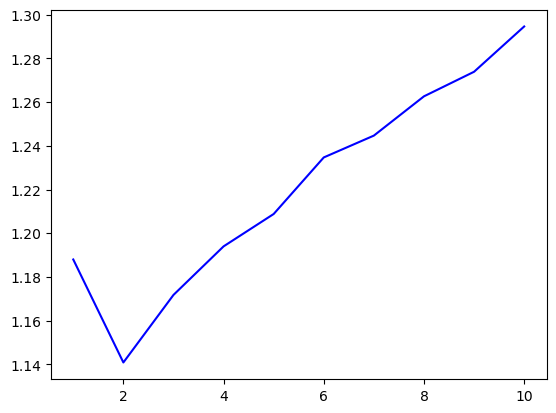

In [115]:
plt.plot(range(1,11),rmse_values,color='blue')
plt.show()

From the above it can be seen that the RMSE values are the least when the dimensions of unknown features in the embeddings matrix is considered as 2.

##### Re-designing the Similarity based recommendation systems with the Matrix Factorization Embeddings.

By Performing the Matrix factorization we got the embedding matrices of both the users and the movies. Now we will use this embeddings matrix to build the item-item and user-user similarity matrix

***Item-Item similarity***

In [116]:
rankings.head()

,QueryMovie,CandidateMovie,Correlation,QueryMovieTitle,CandidateMovieTitle
575,1,2141,1.000000,Toy Story (1995),"American Tail, An (1986)"
621,1,2355,1.000000,Toy Story (1995),"Bug's Life, A (1998)"
829,1,3114,1.000000,Toy Story (1995),Toy Story 2 (1999)
973,1,3751,1.000000,Toy Story (1995),Chicken Run (2000)
149,1,588,0.838525,Toy Story (1995),Aladdin (1992)


We used the Movies dataframe to find the find the pearson correlation and store in the rankings matrix. Instead of using the Movies dataframe we will be using the Embeddings matrix

In [117]:
item_embeddings = pd.DataFrame(model.B_,index=sorted(popular_movies))
item_embeddings.head()

,0,1,2,3,4,5,6,7,8,9
1,-4.117793,0.744495,-5.741961,-1.653255,4.114295,-2.004528,-5.843455,-0.939762,-4.992299,2.156591
2,-0.487693,-1.944294,1.482367,-3.506288,-1.346285,0.446337,-2.309934,-6.346354,-0.384594,5.116044
3,-2.060716,1.377500,0.350125,-7.396082,2.099421,-2.958985,-2.206293,2.910439,-5.239513,3.840015
6,-1.828444,0.648382,-1.831684,-2.647476,2.726073,-2.391526,-5.962579,-0.423515,-3.359165,4.872775
7,-4.269927,0.950980,3.567343,-4.180803,-3.487750,-0.707601,1.874718,-10.563290,-4.548532,7.150586


In [118]:
item_embed_similarity=[]
for index1 in item_embeddings.index:
    for index2 in item_embeddings.index:
        if index1==index2:
            continue
        item_embed_similarity.append([index1,index2,findPearson(item_embeddings.loc[index1],item_embeddings.loc[index2])[0]])
item_embed_similarity=pd.DataFrame(item_embed_similarity,columns=['MovieID1','MovieID2','Correlation'])
item_embed_similarity.head()

,MovieID1,MovieID2,Correlation
0,1,2,0.073037
1,1,3,0.548341
2,1,6,0.861655
3,1,7,0.018734
4,1,10,0.184098


Finding the Query and Candidate title

In [119]:
item_embed_similarity['MovieID1_Title']=item_embed_similarity['MovieID1'].apply(lambda x:orig_movies.loc[orig_movies['Movie ID']==x]['Title'].values[:1][-1])
item_embed_similarity['MovieID2_Title']=item_embed_similarity['MovieID2'].apply(lambda x:orig_movies.loc[orig_movies['Movie ID']==x]['Title'].values[:1][-1])
item_embed_similarity.head()

,MovieID1,MovieID2,Correlation,MovieID1_Title,MovieID2_Title
0,1,2,0.073037,Toy Story (1995),Jumanji (1995)
1,1,3,0.548341,Toy Story (1995),Grumpier Old Men (1995)
2,1,6,0.861655,Toy Story (1995),Heat (1995)
3,1,7,0.018734,Toy Story (1995),Sabrina (1995)
4,1,10,0.184098,Toy Story (1995),GoldenEye (1995)


In [120]:
item_embed_similarity.sort_values(by=['MovieID1','Correlation'],ascending=[True,False],inplace=True)

In [121]:
def get_item_embed_recommendation():
    movie_name=input("Please enter your favorite Movie Title!.. ")
    num_recommendations=int(input("Please enter the number of recommendations required!. "))
    results=item_embed_similarity.loc[item_embed_similarity.MovieID1_Title.str.contains(movie_name)]['MovieID2_Title'].values[:num_recommendations]
    print()
    printMovies(results)

In [133]:
get_item_embed_recommendation()

Please enter your favorite Movie Title!.. Home Alone
Please enter the number of recommendations required!. 10

********** The Recommended Movies **********
Back to the Future Part II (1989)
William Shakespeare's Romeo and Juliet (1996)
Patriot, The (2000)
Contender, The (2000)
Mr. Smith Goes to Washington (1939)
Days of Thunder (1990)
Muppet Movie, The (1979)
Matrix, The (1999)
Misery (1990)
Saving Private Ryan (1998)
********************


In [152]:
get_item_embed_recommendation()

Please enter your favorite Movie Title!.. Toy Story
Please enter the number of recommendations required!. 10

********** The Recommended Movies **********
Jaws 2 (1978)
Parenthood (1989)
Dumb & Dumber (1994)
Liar Liar (1997)
Universal Soldier (1992)
Pinocchio (1940)
Life Is Beautiful (La Vita è bella) (1997)
Jungle Book, The (1967)
Heat (1995)
Interview with the Vampire (1994)
********************


Similarly we can re-design the user-user based recommendation system by using this User embeddings

###### Few Questionnaires

1. Users of which age group have watched and rated the most number of movies?

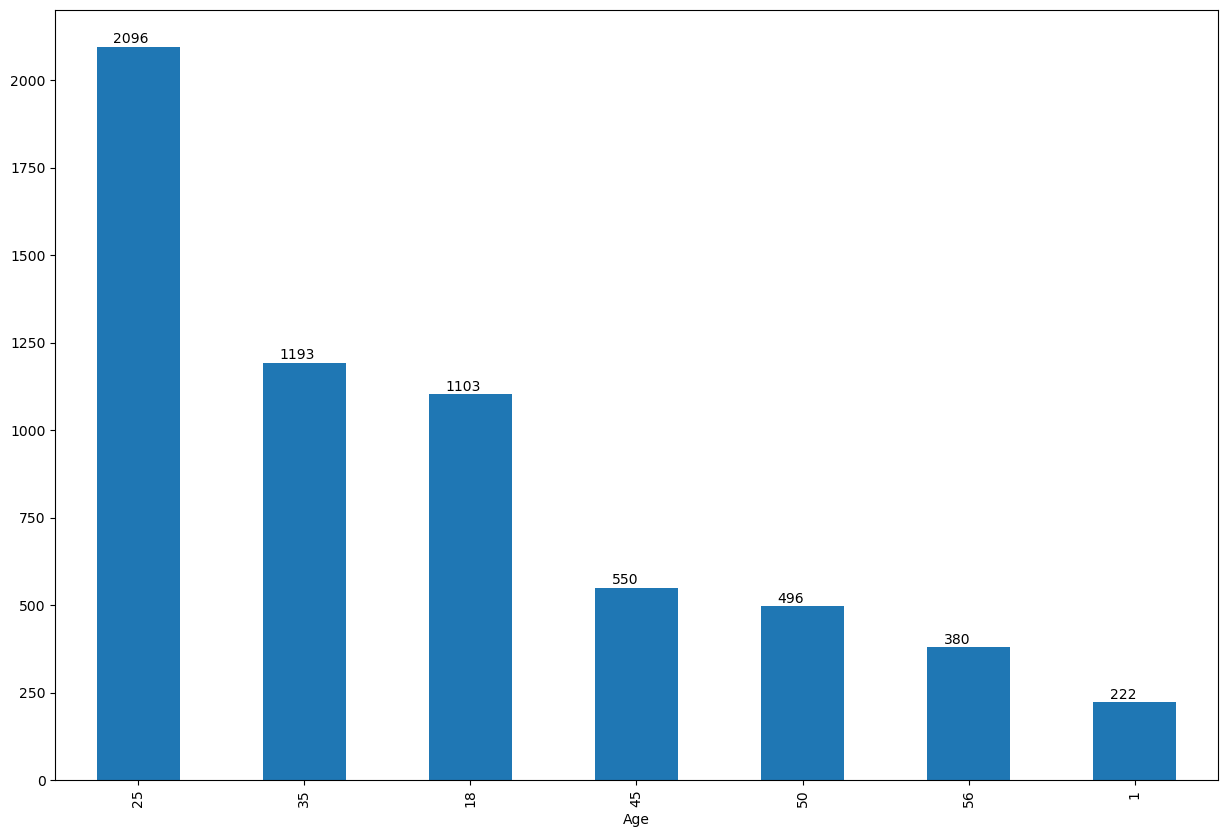

In [140]:
plt.figure(figsize=(15,10))
ax=users_bfr_encode.Age.value_counts().plot(kind='bar')
for patch in ax.patches:
    ax.annotate(patch.get_height(),(patch.get_x()+0.2*patch.get_width(),patch.get_height()+10))
plt.show()

Users in the age gap between 25 and 34 are the active users of the OTT platform.

2. Users belonging to which profession have watched and rated the most movies?

- **College or Grad Students** are the users who have watched and rated most of the movies.

3. Most of the users in our dataset who’ve rated the movies are Male. (T/F)

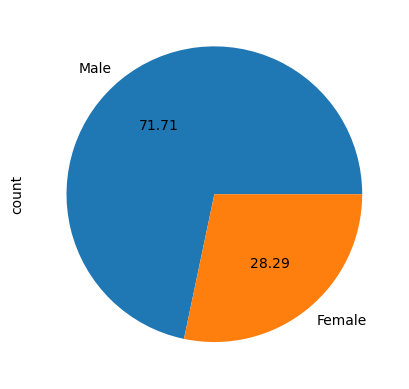

In [124]:
users.loc[ratings.UserID.unique()]['Gender'].map({1:"Male",0:"Female"}).value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

Thus about 71.7% of the users are Male and about 28.3% of the users are Female's in the OTT application

4. Most of the movies present in our dataset were released in which decade?

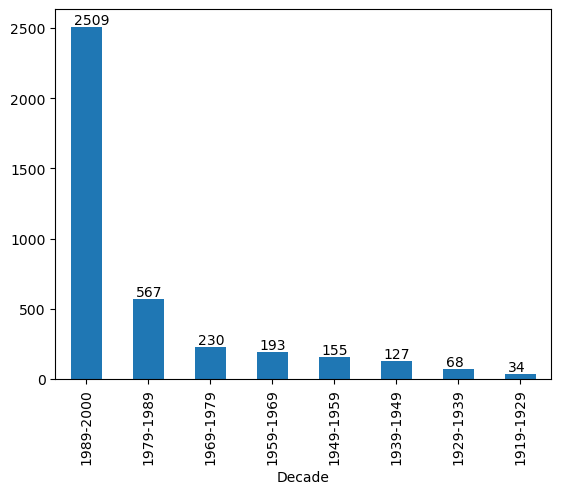

In [125]:
ax=orig_movies.groupby('Decade')['Movie ID'].nunique().sort_values(ascending=False).plot(kind='bar')
for patch in ax.patches:
    ax.annotate(patch.get_height(),(patch.get_x()+(patch.get_width()*0.1),patch.get_height()+20))
plt.show()

We can see from the plot that most of the movies got released in the last decade ie: 1989-2000 which is the 90's

5. The movie with maximum no. of ratings is ___

In [126]:
ratings.groupby("MovieID")['UserID'].nunique().sort_values(ascending=False)

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
2318     320
69       319
2819     319
1769     319
1031     319
Name: UserID, Length: 1000, dtype: int64

From the above series, it can be seen that the movie with maximum number of ratings is the Movie with MovieID "2858".

In [127]:
orig_movies.loc[orig_movies['Movie ID']==2858]

,Movie ID,Title,Genres,Release year,Decade
2789,2858,American Beauty (1999),Comedy,1999.0,1989-2000
2789,2858,American Beauty (1999),Drama,1999.0,1989-2000


Movie with the Movie ID 2858 is "American Beauty" which was released in the year 1999.

6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

In [128]:
get_movie_item_recommendation()

Please enter your favorite movie name :Liar Liar

********** The Recommended Movies **********
Ace Ventura: When Nature Calls (1995)
Mighty Aphrodite (1995)
Friday (1995)
Happy Gilmore (1996)
Birdcage, The (1996)
Brothers McMullen, The (1995)
Mallrats (1995)
Billy Madison (1995)
Clerks (1994)
Dumb & Dumber (1994)
********************


The Top 3 Movies that are so much similar to Liar Liar is: <br>
- Ace Ventura: When Nature Calls (1995)
- Mighty Aphrodite (1995)
- Friday (1995)

7. On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.

Ans::: On the context of Collaborative filtering, There are 2 major techniques. One is Item-based collaborative filtering and Second is User-based collaborative filtering.

8. Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.

Ans::: Pearson correlation value ranges between -1 to +1 whereas, Cosine similarity value ranges between 0 and 1.

9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

In [129]:
printMetrics()

****************************************
The RMSE value is 1.1939955311815287
The MAE value is 0.9735870214564843
****************************************


###### Pickle dumping all the necessary dataframe's to build the streamlit app

In [59]:
import pickle

In [ ]:
with open("Popular_movies.pkl","wb") as f:
    pickle.dump(popular_movies,f)

with open("Active_user_indices.pkl","wb") as f:
    pickle.dump(active_user_index,f)
    
with open("User_details.pkl","wb") as f:
    pickle.dump(users_bfr_encode,f)

with open("Original_movies.pkl","wb") as file1:
    pickle.dump(orig_movies,file1)    #Pickle file's for Item-based Recommendation system

with open("Item_based_cosine.pkl","wb") as file2:
    pickle.dump(item_sim_pv,file2)
    
with open("Item_based_pearson.pkl","wb") as file3:
    pickle.dump(rankings,file3)

with open("Interaction_MF.pkl","wb") as file4:
    pickle.dump(interaction_cmplt,file4)  #Pickle file for User-based Recommendation system using Matrix Factorization.